<a href="https://colab.research.google.com/github/Awynimantha/Research-ML-scripts/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import gc as gc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

from google.colab import drive
drive.mount('/content/drive')

file1 = h5py.File("/content/drive/MyDrive/signal data/big-benign.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/big-infected.h5", "r")
file3 = h5py.File("/content/drive/MyDrive/signal data/dataset-infected-test.h5", "r")
file5 = h5py.File("/content/drive/MyDrive/signal data/test-data.h5", "r")

Num GPUs Available: 0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

file1 = h5py.File("/content/drive/MyDrive/signal data/big-benign.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/big-infected.h5", "r")

batch_keys = list(file1.keys())[:100] + list(file2.keys())[0:100] + list(file1.keys())[100:] + list(file2.keys())[100:]
random.shuffle(batch_keys)
n_components = 100
pca = PCA(n_components=n_components)
X_batch = []
y_batch = []
count = 1

for name in batch_keys:
            data = []
            label = 0
            if name in file1:
                label = 0
                data = file1[name]
            else:
                label = 1
                data = file2[name]

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix
            # Flatten the PCA output to 1D and append it to the batch
            X_batch.append(Zxx_pca.flatten())  # Flatten PCA output
            y_batch.append(label)
            print(count)
            count = count+1

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


3


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


4


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


6


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


7


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


8


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


9


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


11


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


12


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


13


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


14


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


15


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


16


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


17


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


18


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


19


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


21


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


22


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


23


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


24


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


25


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


26


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


27


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


28


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


29


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


30


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


31


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


32


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


33


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


34


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


35


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


36


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


37


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


38


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


39


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


40


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


41


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


42


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


43


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


44


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


45


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


46


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


47


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


48


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


49


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


50


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


51


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


52


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


53


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


54


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


55


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


56


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


57


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


58


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


59


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


60


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


61


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


62


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


63


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


64


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


65


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


66


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


67


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


68


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


69


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


70


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


71


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


72


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


73


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


74


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


75


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


76


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


77


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


78


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


79


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


80


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


81


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


82


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


83


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


84


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


85


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


86


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


87


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


88


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


89


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


90


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


91


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


92


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


93


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


94


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


95


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


96


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


97


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


98


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


99


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


100


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


101


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


102


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


103


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


104


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


105


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


106


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


107


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


108


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


109


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


110


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


111


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


112


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


113


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


114


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


115


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


116


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


117


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


118


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


119


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


120


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


121


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


122


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


123


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


124


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


125


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


126


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


127


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


128


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


129


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


130


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


131


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


132


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


133


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


134


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


135


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


136


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


137


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


138


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


139


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


140


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


141


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


142


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


143


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


144


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


145


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


146


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


147


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


148


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


149


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


150


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


151


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


152


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


153


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


154


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


155


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


156


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


157


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


158


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


159


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


160


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


161


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


162


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


163


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


164


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


165


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


166


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


167


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


168


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


169


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


170


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


171


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


172


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


173


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


174


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


175


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


176


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


177


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


178


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


179


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


180


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


181


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


182


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


183


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


184


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


185


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


186


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


187


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


188


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


189


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


190


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


191


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


192


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


193


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


194


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


195


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


196


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


197


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


198


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


199


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


200


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


201


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


202


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


203


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


204


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


205


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


206


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


207


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


208


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


209


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


210


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


211


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


212


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


213


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


214


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


215


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


216


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


217


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


218


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


219


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


220


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


221


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


222


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


223


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


224


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


225


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


226


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


227


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


228


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


229


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


230


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


231


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


232


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


233


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


234


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


235


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


236


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


237


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


238


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


239


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


240


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


241


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


242


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


243


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


244


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


245


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


246


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


247


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


248


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


249


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


250


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


251


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


252


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


253


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


254


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


255


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


256


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


257


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


258


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


259


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


260


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


261


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


262


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


263


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


264


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


265


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


266


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


267


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


268


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


269


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


270


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


271


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


272


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


273


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


274


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


275


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


276


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


277


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


278


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


279


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


280


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


281


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


282


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


283


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


284


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


285


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


286


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


287


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


288


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


289


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


290


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


291


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


292


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


293


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


294


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


295


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


296


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


297


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


298


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


299


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


300


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


301


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


302


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


303


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


304


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


305


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


306


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


307


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


308


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


309


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


310


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


311


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


312


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


313


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


314


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


315


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


316


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


317


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


318


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


319


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


320


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


321


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


322


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


323


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


324


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


325


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


326


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


327


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


328


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


329


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


330


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


331


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


332


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


333


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


334


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


335


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


336


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


337


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


338


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


339


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


340


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


341


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


342


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


343


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


344


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


345


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


346


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


347


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


348


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


349


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


350


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


351


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


352


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


353


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


354


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


355


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


356


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


357


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


358


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


359


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


360


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


361


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


362


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


363


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


364


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


365


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


366


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


367


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


368


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


369


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


370


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


371


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


372


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


373


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


374


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


375


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


376


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


377


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


378


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


379


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


380


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


381


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


382


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


383


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


384


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


385


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


386


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


387


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


388


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


389


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


390


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


391


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


392


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


393


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


394


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


395


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


396


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


397


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


398


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


399


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


400


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


401


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


402


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


403


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


404


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


405


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


406


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


407


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


408


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


409


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


410


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


411


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


412


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


413


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


414


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


415


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


416


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


417


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


418


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


419


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


420


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


421


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


422


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


423


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


424


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


425


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


426


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


427


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


428


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


429


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


430


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


431


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


432


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


433


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


434


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


435


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


436


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


437


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


438


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


439


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


440


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


441


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


442


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


443


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


444


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


445


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


446


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


447


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


448


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


449


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


450


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


451


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


452


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


453


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


454


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


455


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


456


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


457


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


458


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


459


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


460


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


461


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


462


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


463


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


464


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


465


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


466


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


467


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


468


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


469


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


470


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


471


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


472


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


473


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


474


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


475


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


476


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


477


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


478


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


479


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


480


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


481


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


482


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


483


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


484


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


485


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


486


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


487


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


488


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


489


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


490


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


491


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


492


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


493


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


494


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


495


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


496


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


497


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


498


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


499


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


500


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


501


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


502


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


503


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


504


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


505


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


506


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


507


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


508


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


509


In [ ]:
import numpy as np

# Convert to NumPy arrays
X_batch_np = np.array(X_batch)
y_batch_np = np.array(y_batch)

# Save them as .npy files
np.save('/content/drive/MyDrive/SVM/data(2048,1024)/X_data_batch.npy', X_batch_np)
np.save('/content/drive/MyDrive/SVM/data(2048,1024)/y_data_batch.npy', y_batch_np)

import joblib

# After fitting PCA on training data
joblib.dump(pca, '/content/drive/MyDrive/pca/pca_model.pkl')  # Saves the PCA model to disk
temp_pca = pca


In [ ]:
import numpy as np
import joblib
# Load the .npy files
X_batch_loaded = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/X_data_batch.npy')
y_batch_loaded = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/y_data_batch.npy')

pca = joblib.load('/content/drive/MyDrive/pca/pca_model.pkl')  # Loads the saved PCA model



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

# Load the .npy files
X_batch_loaded = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/X_data_batch.npy')
y_batch_loaded = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/y_data_batch.npy')

pca = joblib.load('/content/drive/MyDrive/pca/pca_model.pkl')  # Loads the saved PCA model

X_train, X_test, y_train, y_test = train_test_split(np.array(X_batch_loaded), np.array(y_batch_loaded), test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear', verbose=1)
svm_model.fit(np.array(X_train), np.array(y_train))
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[LibSVM]Accuracy: 0.9477124183006536


In [ ]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.93      0.98      0.95        82

    accuracy                           0.95       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153



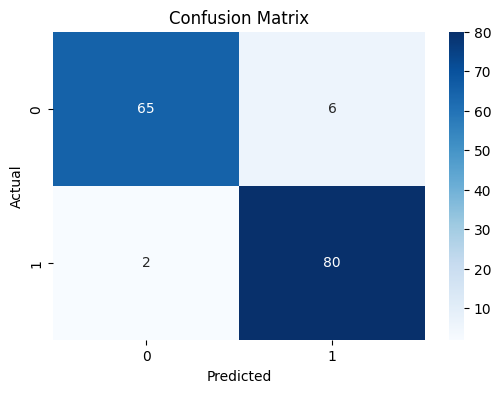

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


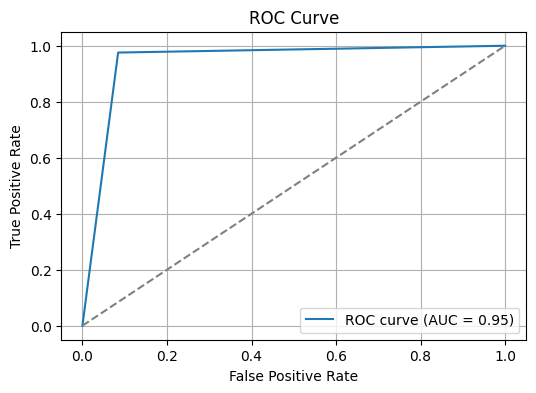

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = svm_model.predict(np.array(X_test))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random
file1 = h5py.File("/content/drive/MyDrive/signal data/test-benign-idle-5.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/test-infected-idle-5.h5", "r")
batch_keys = list(file1.keys())[:100] + list(file2.keys())[0:100] + list(file1.keys())[100:] + list(file2.keys())[100:]
random.shuffle(batch_keys)
n_components = 100
X_test_batch = []
y_test_batch = []


for name in batch_keys:
            data = []
            label = 0
            if name in file1:
                label = 0
                data = file1[name]
            else:
                label = 1
                data = file2[name]

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch.append(label)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

batch_keys = list(file1.keys())
random.shuffle(batch_keys)
n_components = 100
batch_keys = list(file5.keys())


for name in batch_keys:
            data = []
            label = 0
            if(file5[name].attrs.get('label') == "benign"):
              label = 0
              data = file5[name]
            else:
              label = 1
              data = file5[name]

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch.append(label)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

def add_gaussian_noise(signal, noise_level=0.005):
    real_noise = np.random.normal(0, noise_level, size=signal.shape)
    imag_noise = np.random.normal(0, noise_level, size=signal.shape)
    noisy_signal = signal + (real_noise + 1j * imag_noise)
    return noisy_signal

file1 = h5py.File("/content/drive/MyDrive/signal data/test-benign-idle-5.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/test-infected-idle-5.h5", "r")
random.shuffle(batch_keys)
n_components = 100

keys = list(file1.keys())[3:8]+list(file2.keys())[3:9]

for name in keys:
            data = []
            label = 0
            if name in file1:
                label = 0
                data = file1[name]
            else:
                label = 1
                data = file2[name]
            data = add_gaussian_noise(data)
            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch.append(label)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
import numpy as np

# Convert to NumPy arrays
X_batch_np = np.array(X_test_batch)
y_batch_np = np.array(y_test_batch)

# Save them as .npy files
np.save('/content/drive/MyDrive/SVM/data(2048,1024)/X_batch_test_noise.npy', X_batch_np)
np.save('/content/drive/MyDrive/SVM/data(2048,1024)/y_batch_test_noise.npy', y_batch_np)


In [ ]:
import numpy as np

# Load the .npy files
X_batch_loaded_test = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/X_batch_test_noise.npy')
y_batch_loaded_test = np.load('/content/drive/MyDrive/SVM/data(2048,1024)/y_batch_test_noise.npy')

X_batch_loaded_test = X_batch_loaded_test.tolist()
y_batch_loaded_test = y_batch_loaded_test.tolist()



In [ ]:
print(len(X_test_batch))
print(len(y_test_batch))

100
100


In [ ]:
y_pred = svm_model.predict(X_test_batch)
accuracy = accuracy_score(y_test_batch, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [ ]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test_batch))
y_pred = np.round(y_pred).flatten()
print(classification_report(np.array(y_test_batch), y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.94      0.96      0.95        47

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



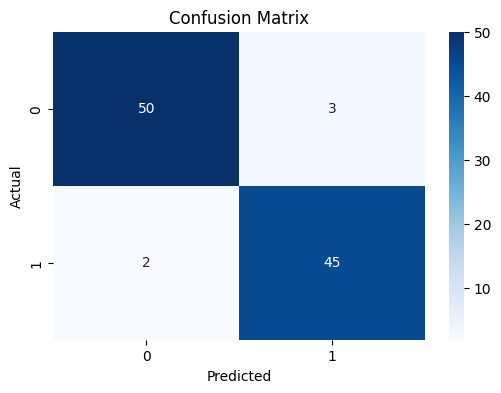

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


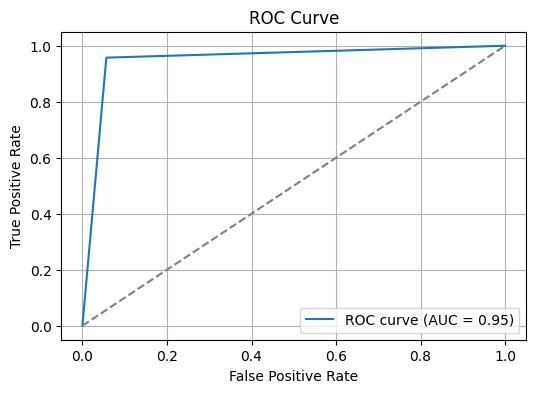

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = svm_model.predict(np.array(X_test_batch))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_batch, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# Test

In [ ]:
file6 = h5py.File("/content/drive/MyDrive/signal data/benign-single.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-single.h5", "r")
file8 = h5py.File("/content/drive/MyDrive/signal data/benign-gamesall.h5", "r")
file9 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")

In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

batch_keys = list(file1.keys())
random.shuffle(batch_keys)
n_components = 100
batch_keys = list(file8.keys())
X_test_batch_b_a = []
y_test_batch_b_a = []

for name in batch_keys:
            data = []
            label = 0
            if(file8[name].attrs.get('label') == "benign"):
              label = 0
              data = file8[name]
              print("benign")
            else:
              label = 1
              data = file8[name]

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch_b_a.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch_b_a.append(label)

benign


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
benign


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
benign


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

batch_keys = list(file1.keys())
random.shuffle(batch_keys)
n_components = 100
batch_keys = list(file9.keys())
X_test_batch_i_a = []
y_test_batch_i_a = []

for name in batch_keys:
            data = []
            label = 0
            if(file9[name].attrs.get('label') == "benign"):
              label = 0
              data = file9[name]
            else:
              label = 1
              data = file9[name]
              print("infected")

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch_i_a.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch_i_a.append(label)

infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

batch_keys = list(file6.keys())
random.shuffle(batch_keys)
n_components = 100
batch_keys = list(file6.keys())
X_test_batch_b_s = []
y_test_batch_b_s = []

for name in batch_keys:
            data = []
            label = 0
            if(file6[name].attrs.get('label') == "benign"):
              label = 0
              data = file6[name]
            else:
              label = 1
              data = file6[name]
              print("infected")

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch_b_s.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch_b_s.append(label)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


In [ ]:
from tensorflow.keras.utils import Sequence
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

batch_keys = list(file1.keys())
random.shuffle(batch_keys)
n_components = 100
batch_keys = list(file7.keys())
X_test_batch_i_s = []
y_test_batch_i_s = []

for name in batch_keys:
            data = []
            label = 0
            if(file7[name].attrs.get('label') == "benign"):
              label = 0
              data = file7[name]
            else:
              label = 1
              data = file7[name]
              print("infected")

            data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

            # Use TensorFlow's STFT function for GPU support
            Zxx = tf.signal.stft(data_tensor, frame_length=2048, frame_step=1024, fft_length=2048)  # Adjusted frame length and step

            # Convert complex STFT to real-valued magnitude spectrogram
            Zxx = tf.abs(Zxx)

            # Convert to NumPy for PCA processing (need to convert to 2D array: frequency x time)
            Zxx_flattened = Zxx.numpy()  # Convert to NumPy array
            Zxx_flattened = Zxx_flattened.T  # Transpose to shape (time, frequency)

            # Perform PCA for dimensionality reduction

            Zxx_pca = pca.fit_transform(Zxx_flattened)  # Apply PCA on the 2D matrix

            print("Zxx_pca shape:", [Zxx_pca.shape])
            # Flatten the PCA output to 1D and append it to the batch
            X_test_batch_i_s.append(Zxx_pca.flatten())  # Flatten PCA output
            y_test_batch_i_s.append(label)

infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]
infected


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


Zxx_pca shape: [(1025, 100)]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


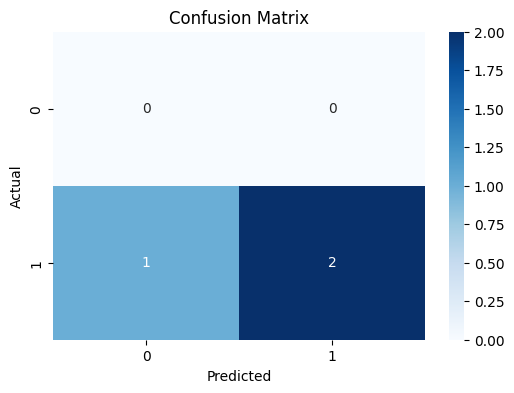

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test_batch_i_a))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_i_a, y_pred))

cm = confusion_matrix(y_test_batch_i_a, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


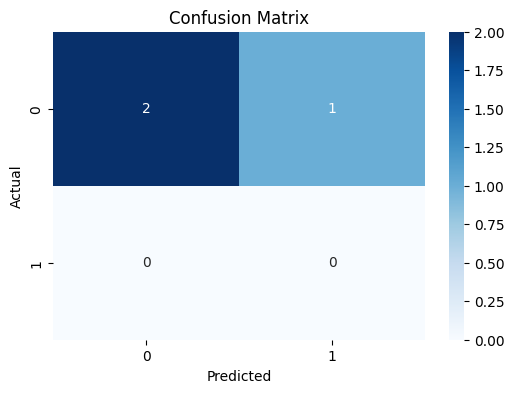

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test_batch_b_a))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_b_a, y_pred))

cm = confusion_matrix(y_test_batch_b_a, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


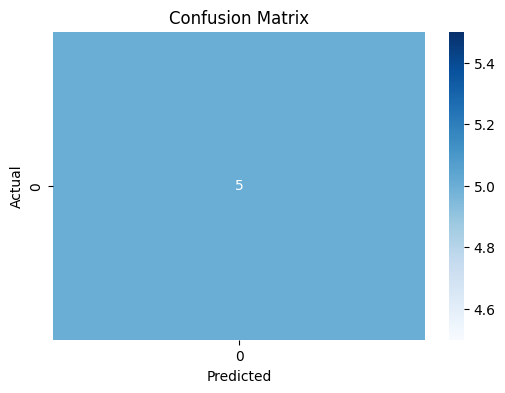

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test_batch_b_s))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_b_s, y_pred))

cm = confusion_matrix(y_test_batch_b_s, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


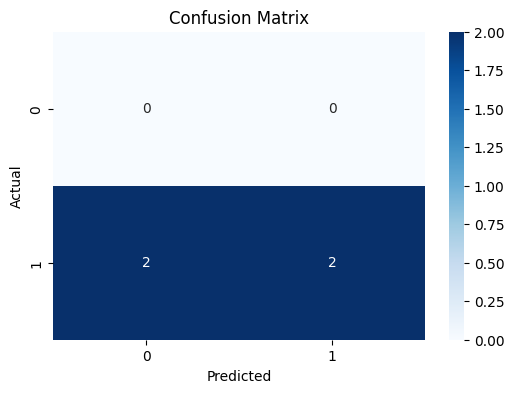

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
y_pred = svm_model.predict(np.array(X_test_batch_i_s))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_i_s, y_pred))

cm = confusion_matrix(y_test_batch_i_s, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
